<div style="max-width:66ch;">

# Lecture notes - Image kernels

This is the lecture note for **image kernels** which is the main component in convolutional neural networks (CNN). 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to image kernels and image preprocessing. I encourage you to read further about image kernels. </p>

Read more:

- [Image kernels explained visually - setosa.io](https://setosa.io/ev/image-kernels/)
- [Kernel image processing - wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))
- [Intuitive guide to convolution](https://betterexplained.com/articles/intuitive-convolution/)
- [numpy image BGR to RGB](https://www.scivision.dev/numpy-image-bgr-to-rgb/)
- [But what is convolution - 3blue1brown](https://www.google.com/search?q=convolution+illustration&oq=convolution+illustration&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQLhhA0gEINzMwMWowajSoAgCwAgA&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:688a537e,vid:KuXjwB4LzSA,st:0)

</div>


<div style="max-width:66ch;">

## Paths

We will later read and write image data to different directories, so it is important to understand how paths work. Note that there is a difference in how to work with paths in Jupyter notebook in contrast with Python script when we work in Visual studio code. 

- in Jupyter notebook the path is relative to where the file is
- in Python script when we click the play button it is relative to the working directory in the terminal 

</div>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from pathlib import Path

# for python scripts use 
# Path(__file__)
# to get to current file

# in python script 
# Path(__file__).parents[1] 
path = Path().absolute()
print(f"{path=}")

data_path = Path().absolute().parent / "data"
print(f"{data_path=}")


path=PosixPath('/Users/kokchungiang/Documents/AIgineer/private repos/AI-part-2-handelsakademin/lecture_code')
data_path=PosixPath('/Users/kokchungiang/Documents/AIgineer/private repos/AI-part-2-handelsakademin/data')


<div style="max-width:66ch;">

## Read and explore image

We explore the image characteristics 

</div>

In [62]:
image = plt.imread(data_path / "Homer_Simpson_2006.png")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

type(image) = <class 'numpy.ndarray'>
image.shape = (390, 190, 4)


(0.0, 1.0)

Text(0.5, 1.0, 'Histogram of pixel values, we see mostly dark pixels')

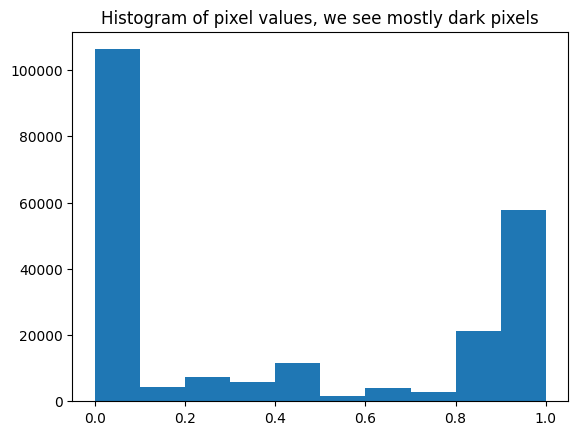

In [81]:
# ellipses operator ... to give all values in the dimensions before the last 
# same as image[:,:,:3]
# we don't include last dimension as it is the alpha channel representing transparency
plt.hist(image[...,:3].flatten());
plt.title("Histogram of pixel values, we see mostly dark pixels")

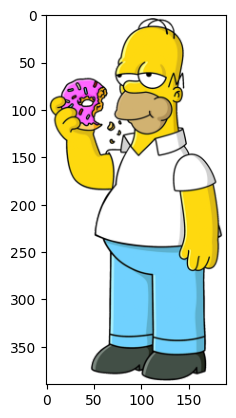

In [65]:
plt.imshow(image)


<div style="max-width:66ch;">

### resize image

```
cv2.resize(image, width, height)
```

the numpy array has dimensions (row, cols) so be careful to pick right dimensions here. Always important to show the image to see that it's correct.
</div>

(95, 195)
(195, 95, 4)


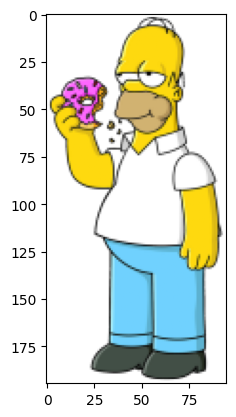

In [83]:
resize_factor = .5
new_size = int(image.shape[1]*resize_factor), int(image.shape[0]*resize_factor), 

print(new_size)
resized_image = cv2.resize(image, new_size)

print(resized_image.shape)

plt.imshow(resized_image)


<div style="max-width:66ch;">

## Image kernels 

Image kernel or image filter is a matrix that can be applied to an image through a convolution operation, which works like a sliding dot-product. By convolving an image with a kernel, features are extracted from the image. There are several kernels that humans have designed to perform different filters on an image, e.g. blurring, edge, sharpen, ... 

For example edge filter

$$K=\begin{pmatrix}
    0 &-1 &0 \\
    -1 &4 &-1 \\
    0 &-1 &0 \\
\end{pmatrix}$$

We can convolve it with the image $A$: 

$$A*K = 
\begin{pmatrix}
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
\end{pmatrix}*
\begin{pmatrix}
    0 &-1 &0 \\
    -1 &4 &-1 \\
    0 &-1 &0 \\
\end{pmatrix} = \begin{pmatrix}
    2 & -1 \\
    2 & -1
\end{pmatrix}
$$

Here we used stride (1,1), which means that the window is moved one step and calculates the dot product, then moves another 1 step to compute dot product again.

We note that the convolved image becomes smaller, so if we want to keep the same size as original image we need to pad it with zeros, yes we will lose information in the borders. 


</div>

In [84]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 4, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/kokchungiang/Documents/AIgineer/private repos/AI-part-2-handelsakademin/data/processed_images


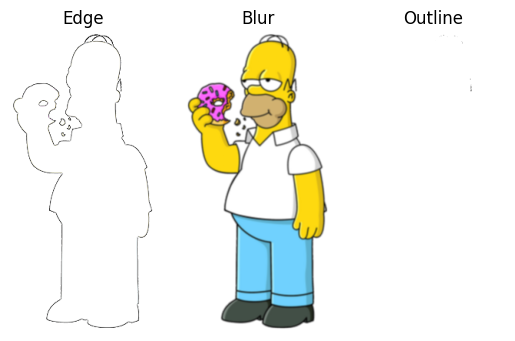

In [92]:
# create the folder processed_images inside data folder
processed_images_path = data_path / "processed_images"

print(processed_images_path)
processed_images_path.mkdir(exist_ok=True)

fig, axes = plt.subplots(1,len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(image,-1, kernel = filter)
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name}")

fig.savefig(processed_images_path/ "filtered_images.png")

<div style="max-width:66ch;">

## Summary

In this lecture we've covered simple image processing using opencv and some convolutional kernels, which are the foundations to convolutional neural networks (CNN).

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
